Variant 24

`3*x**4 - 2*x**3 - x**2 + x - 4 = 0`

In [179]:
def f(x):
    return 3*x**4-2*x**3-x**2+x-4

In [180]:
import numpy as np

def find_segments():
    search_range = np.arange(-10, 10, 0.01)
    
    a = None

    previous_x = None
    current_x  = None

    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    
    return segments

In [181]:
segments = find_segments()

for a, b in segments:
    print(f'Found segment: \x1b[1;3;30;42m [{a}, {b}] \x1b[0m')

Found segment:  [-1.07, -1.06] 
Found segment:  [1.31, 1.32] 


In [184]:
eps = 0.0001

def rec_dihotomy(a, b, eps):
    if f(a) * f((a+b)/2) < 0:
        b = (a+b)/2
    else:
        a = (a+b)/2
    if abs(b-a) < eps:
        return (a+b)/2
    else:
        return rec_dihotomy(a, b, eps)

Root:  -1.0608203125000002 
Root:  1.3144140625 


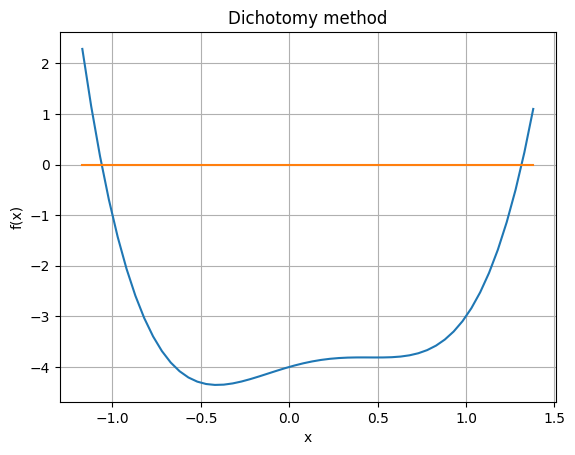

In [185]:
import matplotlib.pyplot as plt

for a, b in segments:
    root = rec_dihotomy(a, b, eps)
    print(f'Root: \x1b[1;3;30;42m {root} \x1b[0m')

a = -1.07
b = 1.32

x = np.arange(a-0.1, b+0.1, 0.05)

plt.plot(x, f(x))
plt.plot(x, x*0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dichotomy method')
plt.grid()
plt.show()

In [ ]:
from scipy.misc import derivative

def hord(a, b, eps):
    if abs(b - a) < eps:
        return None
    
    if f(a) * derivative(f, a, n = 2) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    
    x = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))

    while abs(x - xi) > eps:
        xi = x
        x = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    
    return x

Root:  -1.0607881531122474 
Root:  1.3144384191932736 


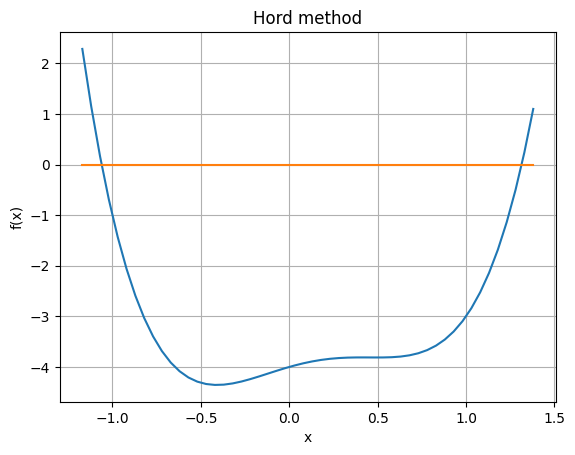

In [186]:
for a, b in segments:
    root = hord(a, b, eps)
    print(f'Root: \x1b[1;3;30;42m {root} \x1b[0m')

a = -1.07
b = 1.32

plt.plot(x, f(x))
plt.plot(x, x*0)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Hord method')
plt.grid()
plt.show()